Mittelwert: 23.80
Standardabweichung: 11.23


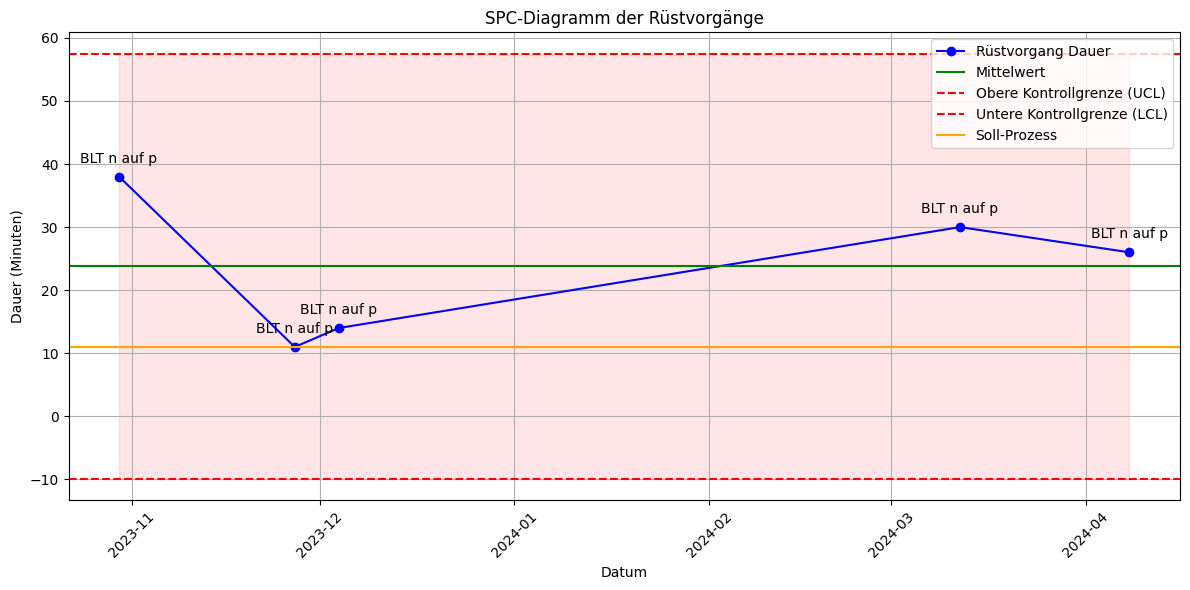

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel-Daten für die Rüstvorgänge mit tatsächlichen Zeitpunkten
data = {
    'Datum': ['2024-04-08', '2024-03-12', '2023-11-27', '2023-12-04', '2023-10-30'],
    'Name': ['BLT n auf p']*5,  # Jeder Rüstvorgang hat denselben Namen 'BLT n auf p'
    'Dauer': [26, 30, 11, 14, 38]  # Beispielwerte für die Dauer der Rüstvorgänge in Minuten
}

# DataFrame erstellen und Datumsspalte in das richtige Datumsformat konvertieren
df = pd.DataFrame(data)
df['Datum'] = pd.to_datetime(df['Datum'], format='%Y-%m-%d')

# Daten nach Datum sortieren
df = df.sort_values(by='Datum')

# Berechnung von Mittelwert (mean) und Standardabweichung (std) der Rüstvorgangsdauern
mean_duration = df['Dauer'].mean()
std_duration = df['Dauer'].std()
print(f"Mittelwert: {mean_duration:.2f}")
print(f"Standardabweichung: {std_duration:.2f}")

# Festlegen der Oberen Kontrollgrenze (UCL) und der Unteren Kontrollgrenze (LCL) für das SPC-Diagramm
ucl = mean_duration + 3 * std_duration
lcl = mean_duration - 3 * std_duration

# Soll-Dauer für den Rüstvorgang (einheitliches Ziel)
soll_dauer = 11  # Beispielwert für den Soll-Prozess in Minuten

# SPC-Diagramm erstellen
plt.figure(figsize=(12, 6))
plt.plot(df['Datum'], df['Dauer'], marker='o', linestyle='-', color='b', label='Rüstvorgang Dauer')
plt.axhline(y=mean_duration, color='g', linestyle='-', label='Mittelwert')
plt.axhline(y=ucl, color='r', linestyle='--', label='Obere Kontrollgrenze (UCL)')
plt.axhline(y=lcl, color='r', linestyle='--', label='Untere Kontrollgrenze (LCL)')
plt.axhline(y=soll_dauer, color='orange', linestyle='-', label='Soll-Prozess')

# Bereich zwischen LCL und UCL einfärben
plt.fill_between(df['Datum'], lcl, ucl, color='red', alpha=0.1)

# Namen der Rüstvorgänge als Annotationen hinzufügen
for i, txt in enumerate(df['Name']):
    plt.annotate(txt, (df['Datum'].iloc[i], df['Dauer'].iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Diagrammbeschriftungen und Legende hinzufügen
plt.xlabel('Datum')
plt.ylabel('Dauer (Minuten)')
plt.title('SPC-Diagramm der Rüstvorgänge')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Datumsetiketten lesbar machen
plt.tight_layout()       # Layout anpassen, um Überlappungen zu vermeiden
plt.show()
